Tervetuloa kamut!

In [1]:
import pandas as pd

#Arff muuttaminen käytettävään muotoon 
#Source: https://stackoverflow.com/questions/62653514/open-an-arff-file-with-scipy-io/66939746#66939746 

data = []
with open('kidney/chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)


In [2]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
count,402,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,3
unique,78,11,6,7,7,3,3,3,3,147,...,93,50,3,7,4,4,4,3,4,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,no,no,no,good,no,no,ckd,
freq,19,116,106,199,290,201,259,354,374,44,...,105,130,251,257,362,316,322,339,248,2


In [3]:
#Dropataan ei halutut kolumnit tarpeettomuuden vuoksi
df = df.drop(columns=[
    'no_name', 'rbc', 'pc', 'pcc', 'ba',
    'sc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'
])
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,?,?,15.4,44,7800,5.2,ckd
1,7,50,1.020,4,0,?,18,?,?,11.3,38,6000,?,ckd
2,62,80,1.010,2,3,423,53,?,?,9.6,31,7500,?,ckd
3,48,70,1.005,4,0,117,56,111,2.5,11.2,32,6700,3.9,ckd
4,51,80,1.010,2,0,106,26,?,?,11.6,35,7300,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,100,26,137,4.4,15.8,49,6600,5.4,notckd
398,17,60,1.025,0,0,114,50,135,4.9,14.2,51,7200,5.9,notckd
399,58,80,1.025,0,0,131,18,141,3.5,15.8,53,6800,6.1,notckd
400,,None,None,None,None,None,None,None,None,None,None,None,None,None


In [4]:
df.dtypes
#TODO: Tyypitä jokainen kolumni kuntoon

age      object
bp       object
sg       object
al       object
su       object
bgr      object
bu       object
sod      object
pot      object
hemo     object
pcv      object
wbcc     object
rbcc     object
class    object
dtype: object

In [5]:
#'?' and 'None' to 'Not a number'
df = df.replace(['?', 'None'], pd.NA)
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,<NA>,<NA>,15.4,44,7800,5.2,ckd
1,7,50,1.020,4,0,<NA>,18,<NA>,<NA>,11.3,38,6000,<NA>,ckd
2,62,80,1.010,2,3,423,53,<NA>,<NA>,9.6,31,7500,<NA>,ckd
3,48,70,1.005,4,0,117,56,111,2.5,11.2,32,6700,3.9,ckd
4,51,80,1.010,2,0,106,26,<NA>,<NA>,11.6,35,7300,4.6,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,100,26,137,4.4,15.8,49,6600,5.4,notckd
398,17,60,1.025,0,0,114,50,135,4.9,14.2,51,7200,5.9,notckd
399,58,80,1.025,0,0,131,18,141,3.5,15.8,53,6800,6.1,notckd
400,,None,None,None,None,None,None,None,None,None,None,None,None,None


In [6]:
#Tiputa rivit jossa >=3 NaN ja korjaa indexointi
df = df.dropna(thresh=len(df.columns)-2)
df = df.reset_index(drop=True)
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48,80,1.020,1,0,121,36,<NA>,<NA>,15.4,44,7800,5.2,ckd
1,48,70,1.005,4,0,117,56,111,2.5,11.2,32,6700,3.9,ckd
2,51,80,1.010,2,0,106,26,<NA>,<NA>,11.6,35,7300,4.6,ckd
3,60,90,1.015,3,0,74,25,142,3.2,12.2,39,7800,4.4,ckd
4,68,70,1.010,0,0,100,54,104,4.0,12.4,36,<NA>,<NA>,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,55,80,1.020,0,0,140,49,150,4.9,15.7,47,6700,4.9,notckd
262,42,70,1.025,0,0,75,31,141,3.5,16.5,54,7800,6.2,notckd
263,12,80,1.020,0,0,100,26,137,4.4,15.8,49,6600,5.4,notckd
264,17,60,1.025,0,0,114,50,135,4.9,14.2,51,7200,5.9,notckd


In [7]:
# Muutetaan kaikki halutut sarakkeet numerotyypeiksi
numeric_cols = ['age', 'bp', 'sg', 'al', 'su',
                'bgr', 'bu', 'sod', 'pot', 'hemo',
                'pcv', 'wbcc', 'rbcc']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Korvataan NaN arvot sarakkeen keskiarvolla
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean()).round(3)

df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1,0,121.0,36.0,138.192,4.519,15.4,44.0,7800.000,5.200,ckd
1,48.0,70.0,1.005,4,0,117.0,56.0,111.000,2.500,11.2,32.0,6700.000,3.900,ckd
2,51.0,80.0,1.010,2,0,106.0,26.0,138.192,4.519,11.6,35.0,7300.000,4.600,ckd
3,60.0,90.0,1.015,3,0,74.0,25.0,142.000,3.200,12.2,39.0,7800.000,4.400,ckd
4,68.0,70.0,1.010,0,0,100.0,54.0,104.000,4.000,12.4,36.0,8498.795,4.759,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,55.0,80.0,1.020,0,0,140.0,49.0,150.000,4.900,15.7,47.0,6700.000,4.900,notckd
262,42.0,70.0,1.025,0,0,75.0,31.0,141.000,3.500,16.5,54.0,7800.000,6.200,notckd
263,12.0,80.0,1.020,0,0,100.0,26.0,137.000,4.400,15.8,49.0,6600.000,5.400,notckd
264,17.0,60.0,1.025,0,0,114.0,50.0,135.000,4.900,14.2,51.0,7200.000,5.900,notckd


In [8]:
#Muutetaan ckd --> a (affected), notckd && no --> c (control)
df['class'] = df['class'].replace({'ckd': 'a', 'notckd': 'c', 'no': 'c'})
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1,0,121.0,36.0,138.192,4.519,15.4,44.0,7800.000,5.200,a
1,48.0,70.0,1.005,4,0,117.0,56.0,111.000,2.500,11.2,32.0,6700.000,3.900,a
2,51.0,80.0,1.010,2,0,106.0,26.0,138.192,4.519,11.6,35.0,7300.000,4.600,a
3,60.0,90.0,1.015,3,0,74.0,25.0,142.000,3.200,12.2,39.0,7800.000,4.400,a
4,68.0,70.0,1.010,0,0,100.0,54.0,104.000,4.000,12.4,36.0,8498.795,4.759,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,55.0,80.0,1.020,0,0,140.0,49.0,150.000,4.900,15.7,47.0,6700.000,4.900,c
262,42.0,70.0,1.025,0,0,75.0,31.0,141.000,3.500,16.5,54.0,7800.000,6.200,c
263,12.0,80.0,1.020,0,0,100.0,26.0,137.000,4.400,15.8,49.0,6600.000,5.400,c
264,17.0,60.0,1.025,0,0,114.0,50.0,135.000,4.900,14.2,51.0,7200.000,5.900,c


In [9]:
#Muutetaan hemoglobiini g/dl --> g/l
df['hemo'] = pd.to_numeric(df['hemo'], errors='coerce') * 10
df

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1,0,121.0,36.0,138.192,4.519,154.0,44.0,7800.000,5.200,a
1,48.0,70.0,1.005,4,0,117.0,56.0,111.000,2.500,112.0,32.0,6700.000,3.900,a
2,51.0,80.0,1.010,2,0,106.0,26.0,138.192,4.519,116.0,35.0,7300.000,4.600,a
3,60.0,90.0,1.015,3,0,74.0,25.0,142.000,3.200,122.0,39.0,7800.000,4.400,a
4,68.0,70.0,1.010,0,0,100.0,54.0,104.000,4.000,124.0,36.0,8498.795,4.759,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,55.0,80.0,1.020,0,0,140.0,49.0,150.000,4.900,157.0,47.0,6700.000,4.900,c
262,42.0,70.0,1.025,0,0,75.0,31.0,141.000,3.500,165.0,54.0,7800.000,6.200,c
263,12.0,80.0,1.020,0,0,100.0,26.0,137.000,4.400,158.0,49.0,6600.000,5.400,c
264,17.0,60.0,1.025,0,0,114.0,50.0,135.000,4.900,142.0,51.0,7200.000,5.900,c


In [10]:
#jaetaan kahdeen dataframeen classin perusteella
df_a = df[df['class'] == 'a']
df_c = df[df['class'] == 'c']

#a:n ja c:n rivimäärät
print("Affected (a):", df_a.shape[0], "rows")
print("Control (c):", df_c.shape[0], "rows")


Affected (a): 127 rows
Control (c): 139 rows


In [11]:
#Näytä dataframe 'a'
df_a

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
0,48.0,80.0,1.020,1,0,121.0,36.0,138.192,4.519,154.0,44.0,7800.000,5.200,a
1,48.0,70.0,1.005,4,0,117.0,56.0,111.000,2.500,112.0,32.0,6700.000,3.900,a
2,51.0,80.0,1.010,2,0,106.0,26.0,138.192,4.519,116.0,35.0,7300.000,4.600,a
3,60.0,90.0,1.015,3,0,74.0,25.0,142.000,3.200,122.0,39.0,7800.000,4.400,a
4,68.0,70.0,1.010,0,0,100.0,54.0,104.000,4.000,124.0,36.0,8498.795,4.759,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,62.0,90.0,1.020,2,1,169.0,48.0,138.000,2.900,134.0,47.0,11000.000,6.100,a
123,64.0,90.0,1.015,3,2,463.0,64.0,135.000,4.100,122.0,40.0,9800.000,4.600,a
124,48.0,110.0,1.015,3,0,106.0,215.0,120.000,5.700,86.0,26.0,5000.000,2.500,a
125,59.0,70.0,1.010,1,3,424.0,55.0,138.000,4.500,126.0,37.0,10200.000,4.100,a


In [12]:
#Näytä dataframe 'c'
df_c

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc,class
127,40.0,80.0,1.025,0,0,140.0,10.0,135.0,5.0,150.0,48.0,10400.0,4.5,c
128,23.0,80.0,1.025,0,0,70.0,36.0,150.0,4.6,170.0,52.0,9800.0,5.0,c
129,45.0,80.0,1.025,0,0,82.0,49.0,147.0,4.4,159.0,46.0,9100.0,4.7,c
130,57.0,80.0,1.025,0,0,119.0,17.0,135.0,4.7,154.0,42.0,6200.0,6.2,c
131,51.0,60.0,1.025,0,0,99.0,38.0,135.0,3.7,130.0,49.0,8300.0,5.2,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,55.0,80.0,1.020,0,0,140.0,49.0,150.0,4.9,157.0,47.0,6700.0,4.9,c
262,42.0,70.0,1.025,0,0,75.0,31.0,141.0,3.5,165.0,54.0,7800.0,6.2,c
263,12.0,80.0,1.020,0,0,100.0,26.0,137.0,4.4,158.0,49.0,6600.0,5.4,c
264,17.0,60.0,1.025,0,0,114.0,50.0,135.0,4.9,142.0,51.0,7200.0,5.9,c


In [13]:
#Näyttää dataframe "a" jokaisen sarakkeen perusstatistiikat
df_a.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
count,127.000000,127.000000,127.000000,127.000000,127.00000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,56.527315,80.642551,1.013646,1.842520,0.80315,178.698567,79.772496,134.397291,4.716079,106.725669,32.509157,9345.536457,4.093866
std,15.014625,15.655724,0.004543,1.433307,1.36300,91.574904,60.273892,7.242547,3.874670,21.856100,7.124069,3520.420778,0.827103
min,4.000000,50.000000,1.005000,0.000000,0.00000,22.000000,1.500000,104.000000,2.500000,31.000000,9.000000,2600.000000,2.100000
25%,49.500000,70.000000,1.010000,0.500000,0.00000,107.500000,36.500000,132.000000,3.950000,95.500000,29.000000,7350.000000,3.500000
50%,60.000000,80.000000,1.015000,2.000000,0.00000,144.000000,58.000000,136.000000,4.400000,109.000000,33.000000,8500.000000,4.100000
75%,65.000000,90.000000,1.015000,3.000000,1.00000,238.500000,106.500000,138.192000,4.800000,120.000000,37.000000,10600.000000,4.759000
max,90.000000,180.000000,1.025000,5.000000,5.00000,490.000000,322.000000,145.000000,47.000000,161.000000,52.000000,26400.000000,8.000000


In [16]:
#Näyttää dataframe "c" jokaisen sarakkeen perusstatistiikat
df_c.describe()

,age,bp,sg,al,su,bgr,bu,sod,pot,hemo,pcv,wbcc,rbcc
count,139.000000,139.000000,139.000000,139.0,139.0,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,46.568345,71.378446,1.022482,0.0,0.0,108.379942,33.528259,141.658820,4.339259,151.570647,46.199014,7725.153849,5.367460
std,15.903719,8.513932,0.002509,0.0,0.0,19.363075,11.940225,4.768042,0.590441,13.013468,4.130702,1799.026051,0.593476
min,12.000000,60.000000,1.020000,0.0,0.0,70.000000,10.000000,135.000000,3.300000,130.000000,39.663000,4300.000000,4.500000
25%,34.000000,60.000000,1.020000,0.0,0.0,93.500000,24.000000,138.000000,3.700000,140.500000,43.000000,6300.000000,4.900000
50%,46.000000,70.000000,1.020000,0.0,0.0,109.000000,33.000000,141.000000,4.500000,150.000000,46.000000,7500.000000,5.300000
75%,58.000000,80.000000,1.025000,0.0,0.0,125.000000,45.000000,145.500000,4.900000,161.500000,50.000000,9200.000000,5.900000
max,80.000000,80.000000,1.025000,0.0,0.0,141.953000,55.607000,150.000000,5.000000,178.000000,54.000000,11000.000000,6.500000


In [19]:
#Funktio histogrammin tekemiseen
import matplotlib.pyplot as plt

def plot_data(df):
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    n_cols = 3 
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  
    plt.figure(figsize=(20, 5 * n_rows))  
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        df[col].plot(kind='hist', title=col)
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


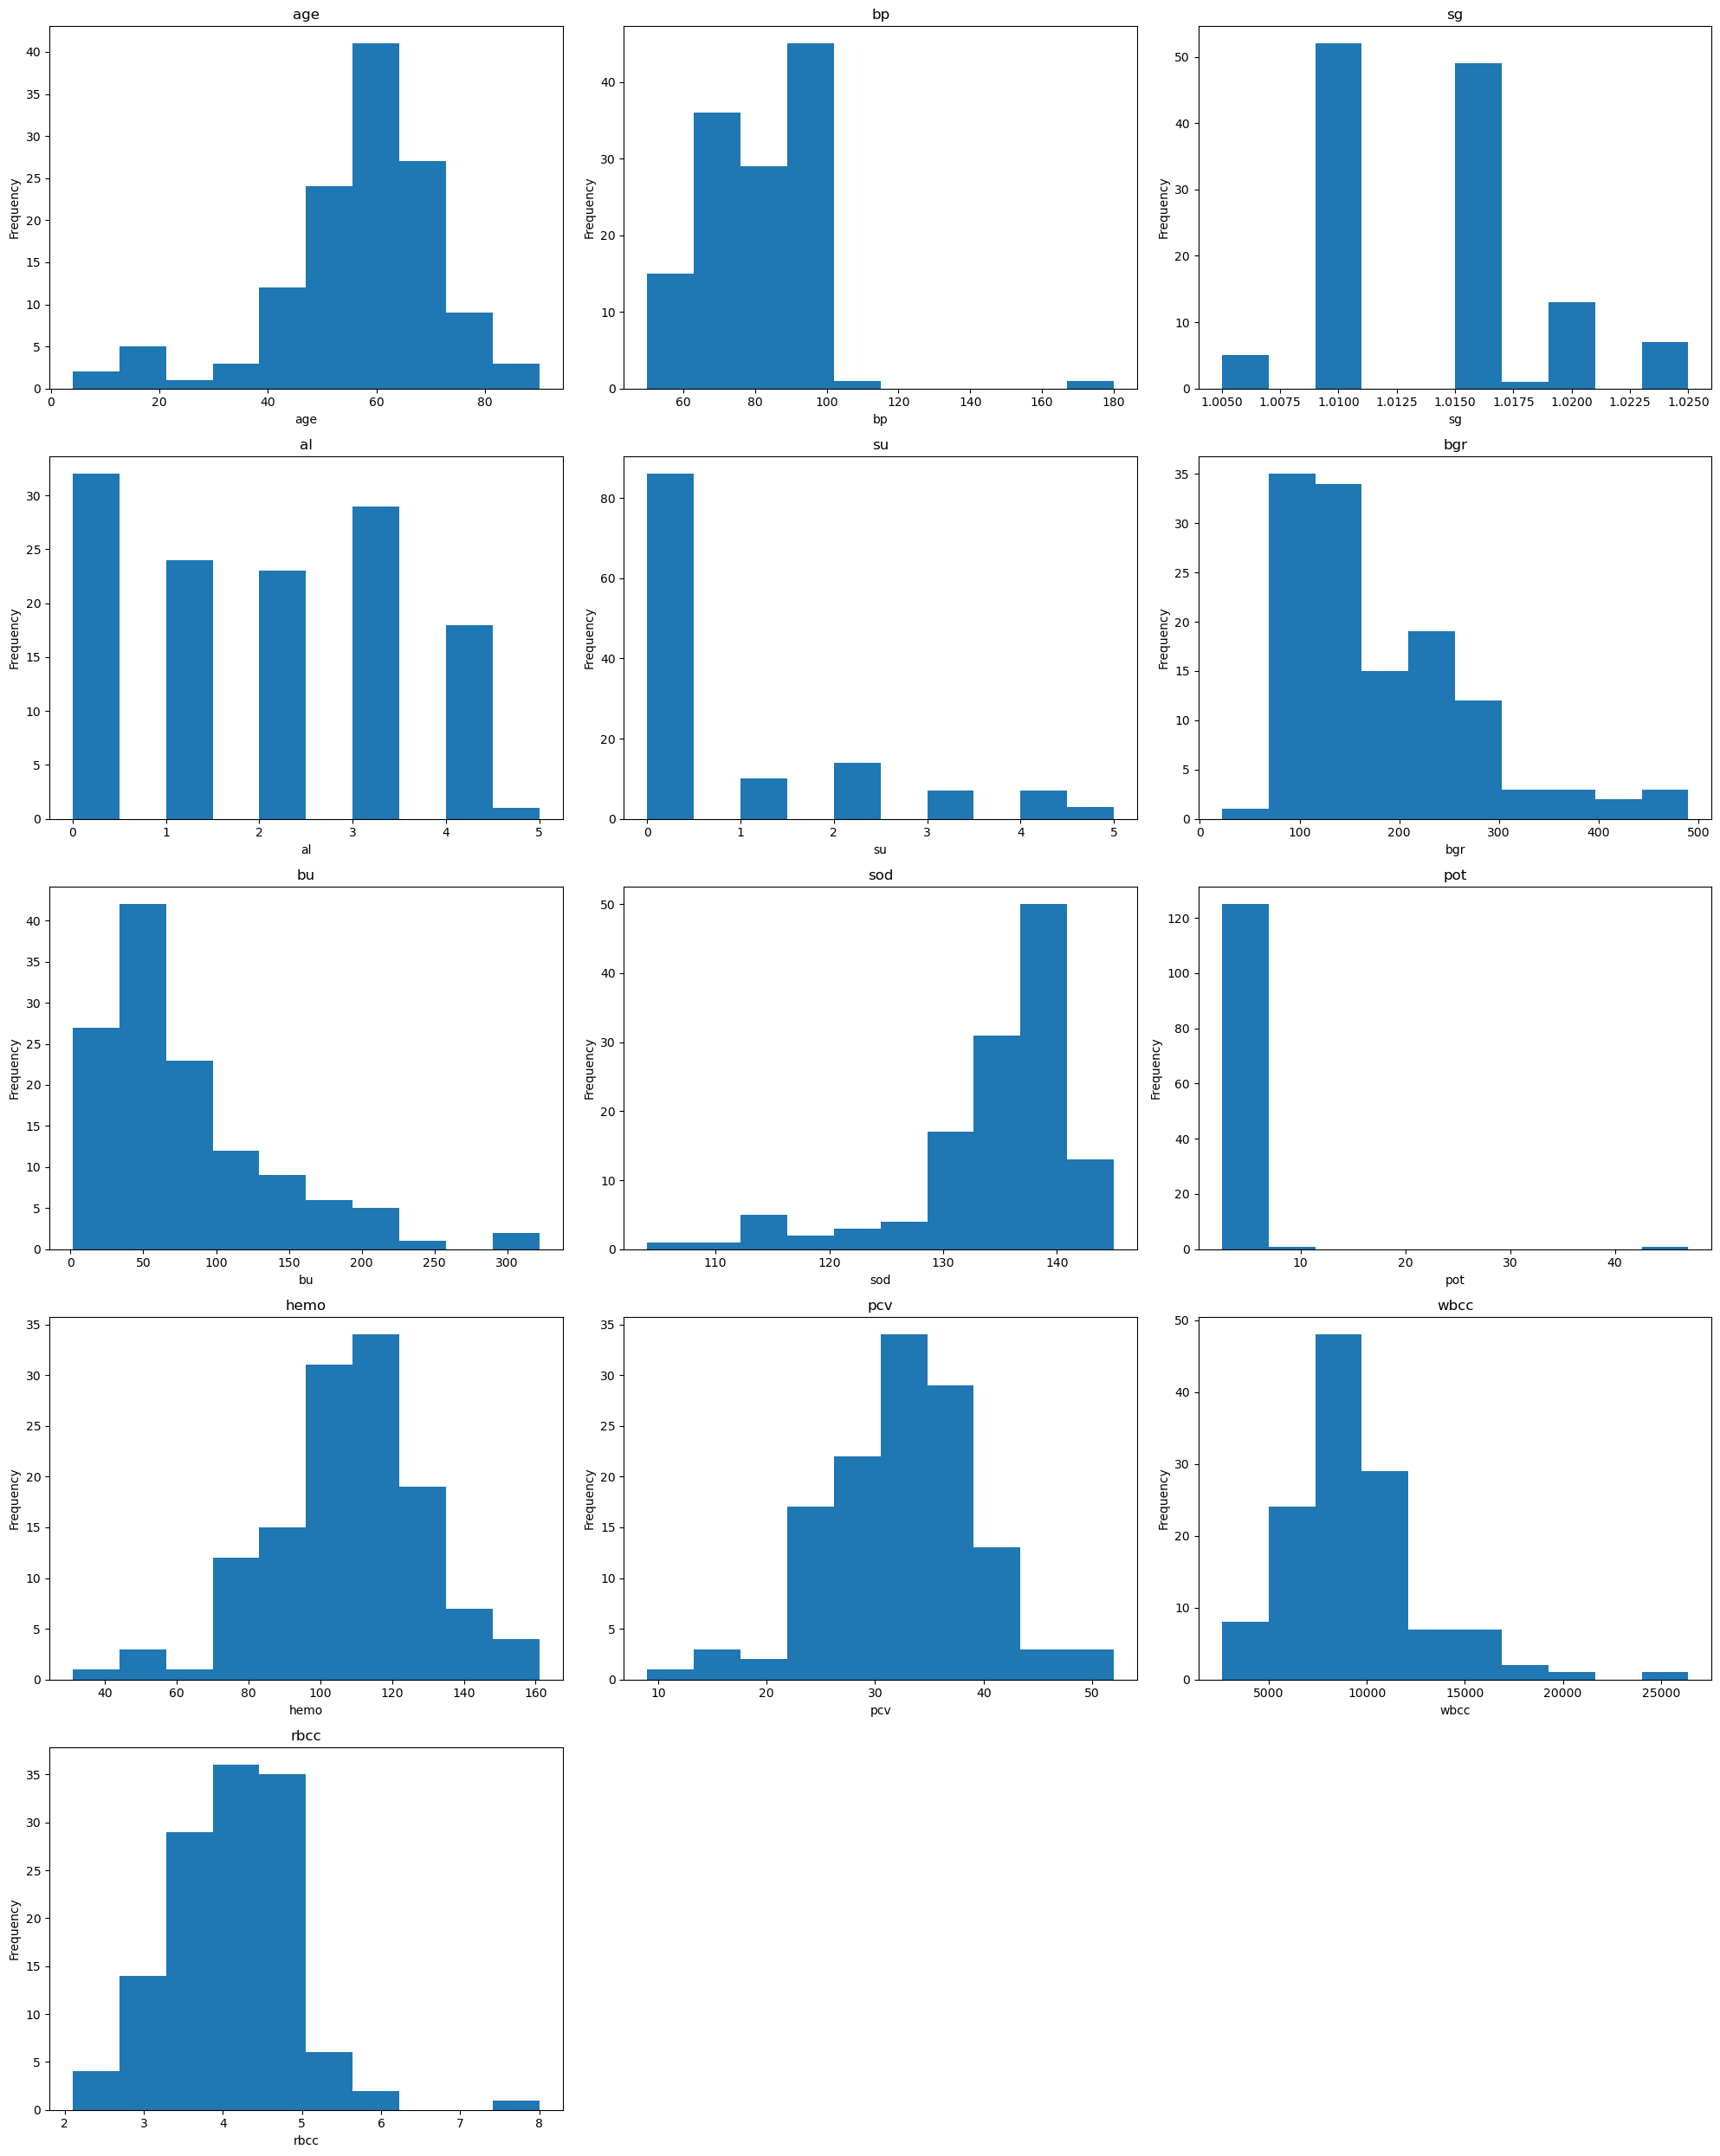

In [23]:
# Dataframe "a" histogrammi
plot_data(df_a)

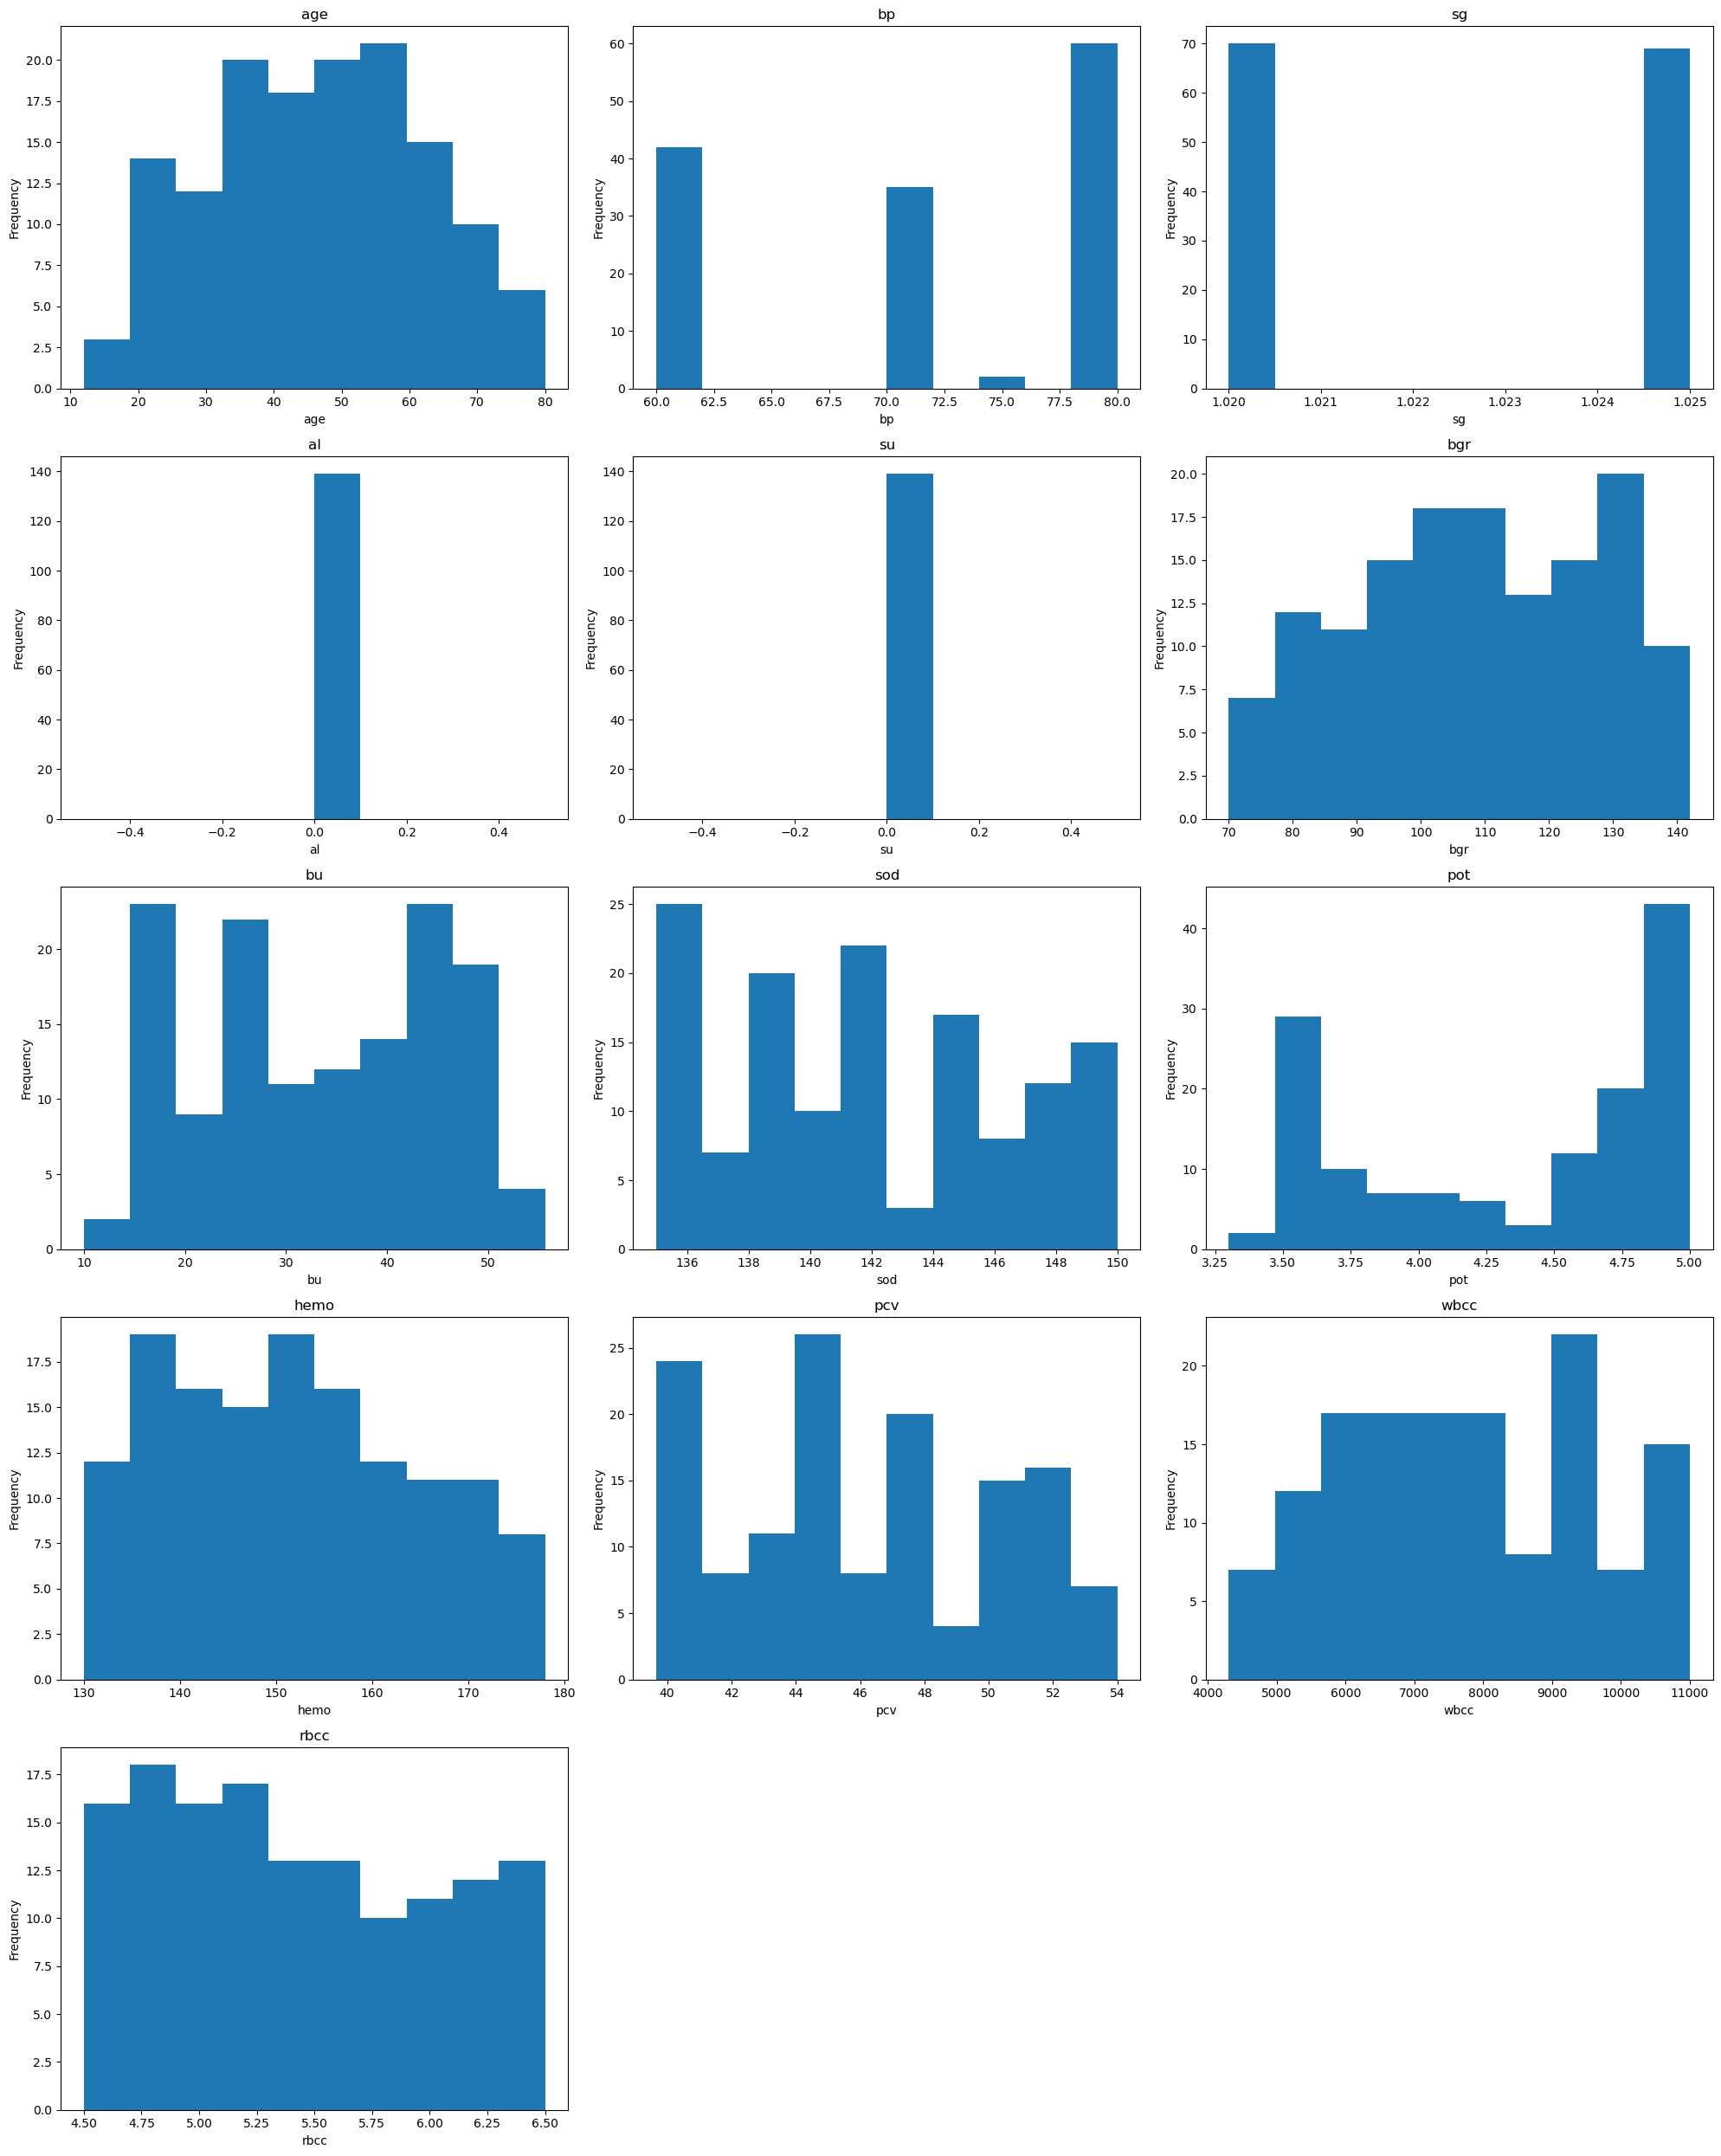

In [22]:
# Dataframe "c" histogrammi
plot_data(df_c)

In [32]:
# Funktio correlaatio matriksin tekoon ja heatmap

import matplotlib.pyplot as plt

def plot_correlation_matrix_matplotlib(df, title):
    numeric_cols = df.select_dtypes(include=['int', 'float']).columns
    corr = df[numeric_cols].corr()
    print(f"Correlation matrix for {title}:\n", corr)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title(f'Correlation matrix heatmap for {title}')
    plt.show()

Correlation matrix for Dataframe (a):
            age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.071969 -0.047036  0.001926  0.152880  0.215334  0.045425   
bp    0.071969  1.000000  0.099249  0.026684  0.183904  0.038722  0.069099   
sg   -0.047036  0.099249  1.000000 -0.076884 -0.031858 -0.085167 -0.052315   
al    0.001926  0.026684 -0.076884  1.000000  0.118069  0.087300  0.428648   
su    0.152880  0.183904 -0.031858  0.118069  1.000000  0.666214 -0.051547   
bgr   0.215334  0.038722 -0.085167  0.087300  0.666214  1.000000 -0.044050   
bu    0.045425  0.069099 -0.052315  0.428648 -0.051547 -0.044050  1.000000   
sod  -0.038181  0.138732  0.136890 -0.218283  0.027654 -0.044544 -0.332949   
pot  -0.002551  0.066258  0.041383  0.171031  0.141037  0.020207  0.191392   
hemo -0.013190 -0.116624  0.113651 -0.379973  0.175297  0.153508 -0.610487   
pcv  -0.036177 -0.120502  0.100349 -0.336661  0.113665  0.109574 -0.569101   
wbcc  0.024965 -0.034296 

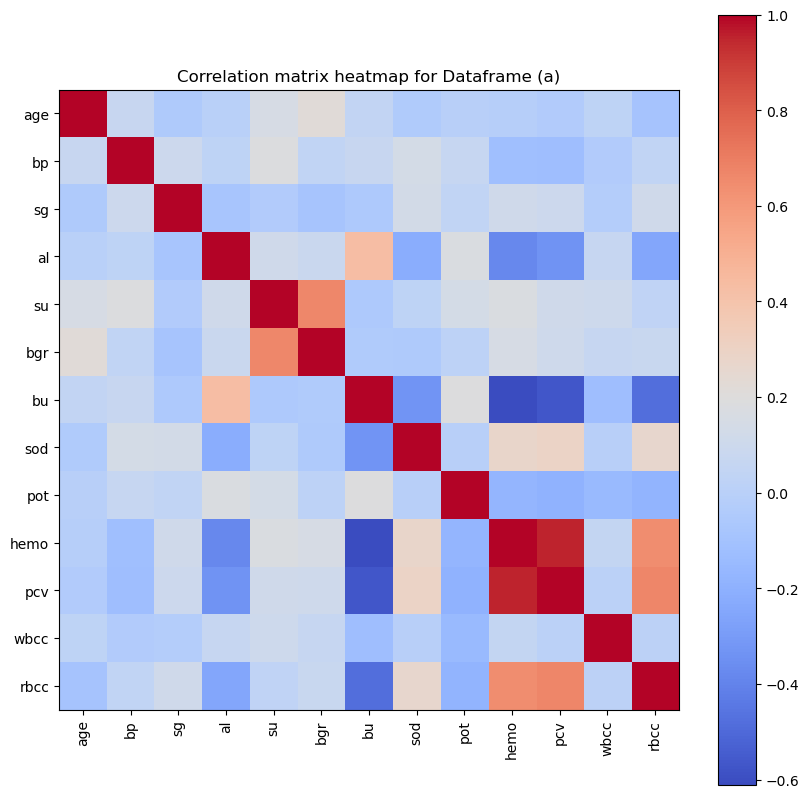

In [33]:
# Dataframe "a" correlation matrix ja heatmap
plot_correlation_matrix_matplotlib(df_a, "Dataframe (a)")

Correlation matrix for Dataframe (c):
            age        bp        sg  al  su       bgr        bu       sod  \
age   1.000000 -0.072757 -0.092814 NaN NaN  0.108339  0.078875  0.105947   
bp   -0.072757  1.000000  0.076135 NaN NaN -0.039424 -0.108057 -0.099753   
sg   -0.092814  0.076135  1.000000 NaN NaN -0.009962 -0.018902 -0.028066   
al         NaN       NaN       NaN NaN NaN       NaN       NaN       NaN   
su         NaN       NaN       NaN NaN NaN       NaN       NaN       NaN   
bgr   0.108339 -0.039424 -0.009962 NaN NaN  1.000000  0.022603 -0.020682   
bu    0.078875 -0.108057 -0.018902 NaN NaN  0.022603  1.000000 -0.046234   
sod   0.105947 -0.099753 -0.028066 NaN NaN -0.020682 -0.046234  1.000000   
pot  -0.091932 -0.057862  0.071175 NaN NaN  0.165923  0.037047  0.060385   
hemo  0.085800  0.143106  0.049520 NaN NaN -0.150563  0.061722 -0.045541   
pcv   0.006584 -0.016132  0.004433 NaN NaN -0.262105  0.058906 -0.003437   
wbcc  0.115814 -0.106402 -0.030798 NaN NaN -0.071

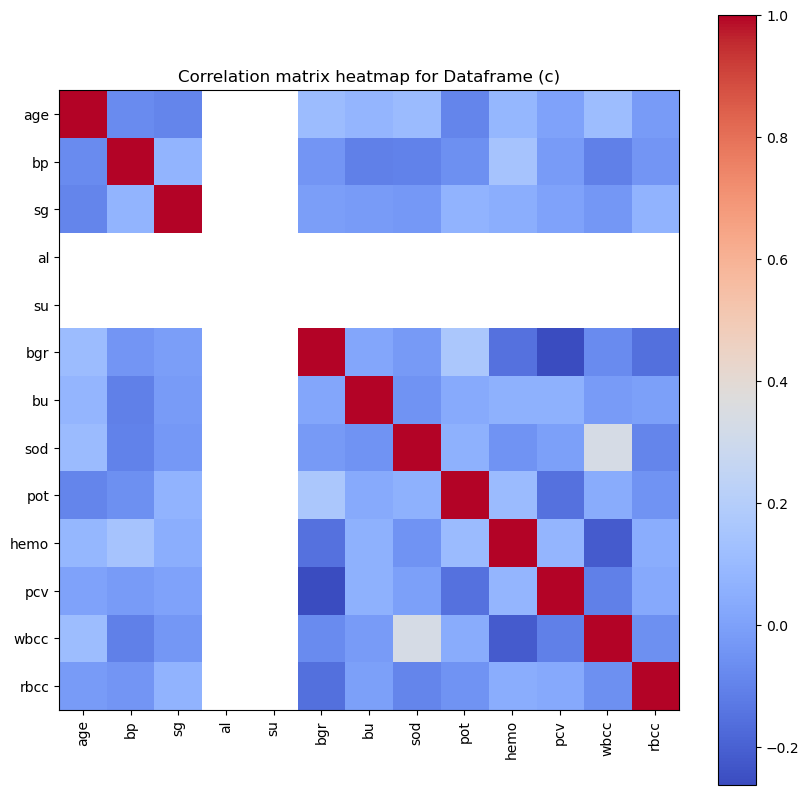

In [34]:
# Dataframe "c" correlation matrix ja heatmap
plot_correlation_matrix_matplotlib(df_c, "Dataframe (c)")